# Rigid transformations in 2D

In this notebook, we are going through rigid transformation, namely rotation, translation and their combination in 2D. This is an important concept to understand before we move on to reconstruction of images. When we think of a camera, we are dealing with multiple reference systems. Therefore, it is really important to understand reference systems and how we denote them before moving to rigid transformations in 2D.

### Multiple reference systems

While dealing with cameras, there are two or more reference systems are involved, we use notations to refer the reference systems. 

We use zero for world reference sytem and then. subsequently 1,2,3... for identifying other frames of reference. 

In the notebook, we are dealing with 2D, and using the Cartesian coordinate system, we will be defining two transformations, rotation and translation and then learn more on Coordinate transformation. 

A point is defined as having x and y coordinates so P=(x,y) and for any transformation T, 

$A_{t}$= TA

The origin $t_{0}$ is represented by

$$ t_{0}=\begin{bmatrix} 0 \\ 0 \end{bmatrix}$$ and we have unit vectors in both reference systems

Let's start with rotation.

### Rotation 

The first transformation is rotation in which two Cartesian reference systems having common origin and having unit points of equal magnitude. Denoting them with subscripts 0 and 1, then 

$$t_{0}=t_{1}=\begin{bmatrix} 0 \\ 0 \end{bmatrix}$$

and then we have unit vectors in both reference systems,

$$\begin{bmatrix} \textbf i_{1} & \textbf j_{1} \end{bmatrix}$$

$$\begin{bmatrix} \textbf i_{0} & \textbf j_{0} \end{bmatrix}$$

For a point in p in reference system $S_{0}$ (the world reference system), the corresponding point in $S_{1}$ reprsented by $ ^{1}p$,

$$^{1}p=\begin{bmatrix} \textbf i_{0} & \textbf j_{1} \end{bmatrix} ^{1}p$$

In a general form, 

$^{a}p = ^{b}R_{a} \ ^{b}p$

### Translation

In rotation above, we transformed from one system of reference to another assuming same origin. But it might not always be the case, so we also take translation into account which will help us relate between origins in $S_{0}$ and $S_{1}$. 

So, 

$$t_{1}=t_{0}+ a $$ where a is a constant matrix. 

## Rigid transformation

There are different classes of transformation and one of them is Rigid transformation and it involves preserving both distance and handedness. Rotation and translation are the transformations relevant to rigid transformation. 

When we combine rotation and translation, then

$^{1}p = R_{1} (p- t_{1}) $

The above is done in accordance with the world reference system.

In general, 

$^{b}p =\ ^{a}R_{b} (^{a}p-\ ^{a}t_{b})$

### Some examples of rigid transformation in Python

In [64]:
#importing libraries

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.pyplot import figure

In [78]:
#defining a rotation function 

def rotate(arr,theta):
    
    """
    Rotates a given array by taking an inner product of the 
    rotation matrix and given 2D array. The rotation matrix is contructed 
    using the angle theta. 
    
    Parameters
    ----------
    arr: ndarray
        the input array to be rotated
    theta: integer
        the angle used for rotating the matrix
    
    Returns
    -------
    rotated_matrix : ndarray
        rotated matrix
    
    Examples
    --------
    >>> rotate([[1,1],[2,2]],45)
    array([[-1.17648506, -1.17648506],
       [ 1.9015475 ,  1.9015475 ]])
    >>> rotate([[1,2],[1,2]],90)
    array([[-1.34207028, -2.68414056],
       [ 0.44592305,  0.89184609]])
    
    """
    theta=theta*np.pi/180
    R=np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
    rotated_matrix=np.dot(arr,R)
    return rotated_matrix

In [79]:
#defining a translation function 

def translate(arr,c):
    
    """
    Translates a given 2D array by changing the x and y coordinates
    and adding the constant value, as mentioned and then rotating it 
    by a given angle. This function translates and rotates the 2D 
    matrix without changing shape or orientation, hence it is a rigid
    transformation
    
    Parameters
    ----------
    arr: ndarray
        the input array to be translated
    c: ndarray
        vector containing constant values by
        which input array is translated
    
    Returns
    -------
    translated_rotated_matrix : ndarray
        translated and rotated matrix
    
    Examples
    --------
    >>> translate([[1,1],[2,2]],[0,-1])
    array([[1, 0],
       [2, 1]])
    >>> translate([[1,2],[1,2]],[1,1])
    array([[2, 3],
       [2, 3]])
    
    """
    translated_matrix=arr-c
    return translated_matrix

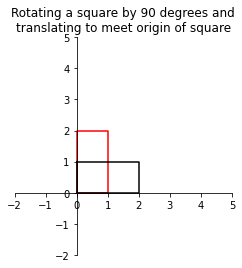

In [84]:
fig, ax = plt.subplots(1, figsize=(6, 4))

a=np.array([[0,0],[0,2],[1,2],[1,0],[0,0]])

trans=translate(a,np.array([1,0]))
rot=rotate(trans,90)


x_original = [i[0] for i in a]
y_original = [i[1] for i in a]

x_transformed = [i[0] for i in rot]
y_transformed = [i[1] for i in rot]

plt.plot(x_original, y_original, 'r')
plt.plot(x_transformed, y_transformed, 'k')

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')

ax.set(ylim=(-2, 5))
ax.set(xlim=(-2, 5))
ax.set_aspect('equal', adjustable='box')

plt.title("Rotating a rectangle by 90 degrees and\ntranslating to meet origin of rectangle")
plt.show()

## Understanding Rigid transformations using images

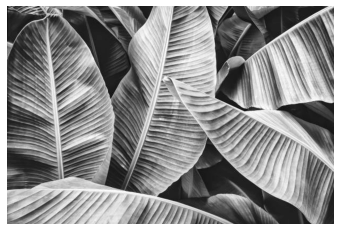

In [61]:
#importing image and converting to grayscale (to make it 2D)

leaf = plt.imread('/Users/srtpan/Desktop/leaf.jpeg')
leaf_2d=leaf[:,:,0]
leaf_image_2d= Image.fromarray(leaf_2d)
plt.imshow(leaf_image_2d, cmap="gray")
plt.axis('off');

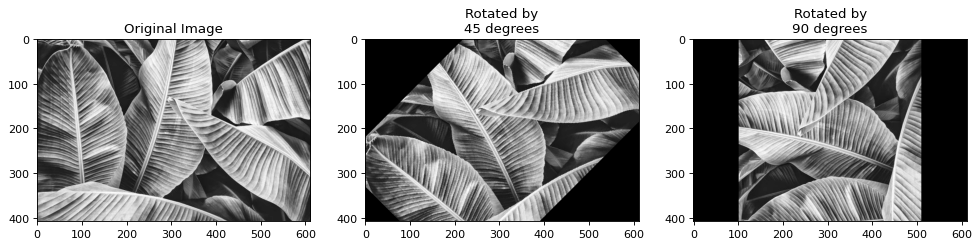

In [65]:
figure(figsize=(15, 6), dpi=80)
# Rotated it by 45 degrees

rotated_45     = leaf_image_2d.rotate(45)

# Rotated it by 90 degrees

rotated_90 = leaf_image_2d.rotate(90)

plt.subplot(131),plt.imshow(leaf_2d, cmap="gray"),plt.title('Original Image')
plt.subplot(132),plt.imshow(rotated_45,cmap="gray"),plt.title('Rotated by\n45 degrees')
plt.subplot(133),plt.imshow(rotated_90,cmap="gray"),plt.title('Rotated by\n90 degrees')
plt.show()

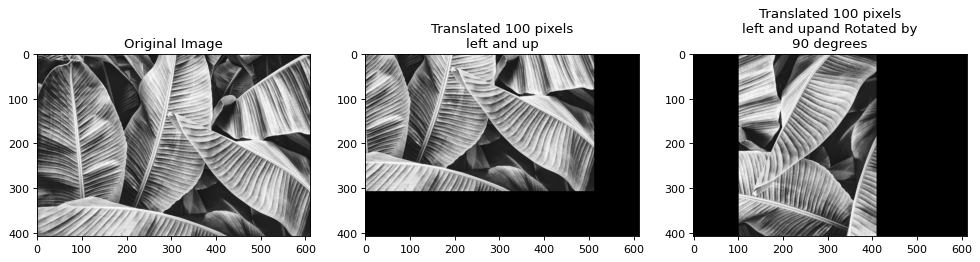

In [92]:
figure(figsize=(15, 6), dpi=80)

a = 1
b = 0
c = 100 #moving left by 100 pixels
d = 0
e = 1
f = 100 #moving up by 100 pixels
translated = leaf_image_2d.transform(leaf_image_2d.size, Image.AFFINE, (a, b, c, d, e, f))
rotated_translated_90 = translated.rotate(90)

plt.subplot(131),plt.imshow(leaf_2d, cmap="gray"),plt.title('Original Image')
plt.subplot(132),plt.imshow(translated,cmap="gray"),plt.title('Translated 100 pixels\nleft and up')
plt.subplot(133),plt.imshow(rotated_translated_90,cmap="gray"),plt.title('Translated 100 pixels\nleft and upand Rotated by\n90 degrees')
plt.show()

The difference can be observed in the two images when they are rotated by 90 degrees and when translated and rotated by 90 degrees. 

These operations are really useful in analyzing images in different orientations and translated versions and can be used to template matching for various shapes and sizes. 

### References:

1. Duke CS 527 Spring 2022: https://courses.cs.duke.edu//spring22/compsci527/notes/n_09_transformations_pinhole.pdf
    
2. Cornell CS4620 Fall 2013: http://www.cs.cornell.edu/courses/cs4620/2013fa/lectures/04transforms2d.pdf

3. PIL Library documentation: https://pillow.readthedocs.io/en/stable/reference/Image.html (accessed on 17/04/2022)